## EMG analysis for dumbbell chest flys

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import *

Import Data

In [2]:
flys, mvc = import_data(",")
mvc_emg_chest = mvc.emg_chest
mvc_emg_shoulder = mvc.emg_shoulder
mvc_time = mvc.t
flys_emg_chest = flys.emg_chest
flys_emg_shoulder = flys.emg_shoulder
flys_time = flys.t

c:\Users\janni\Desktop\emg-biosignal-processing\utils.py:37: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  mcv_data = pd.read_csv(
c:\Users\janni\Desktop\emg-biosignal-processing\utils.py:37: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  mcv_data = pd.read_csv(
c:\Users\janni\Desktop\emg-biosignal-processing\utils.py:46: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  flys_data = pd.read_csv(flys_string,
c:\Users\janni\Desktop\emg-biosignal-processing\utils.py:46: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  flys_data = pd.read

### MVC Test

Plot Raw MVC Data

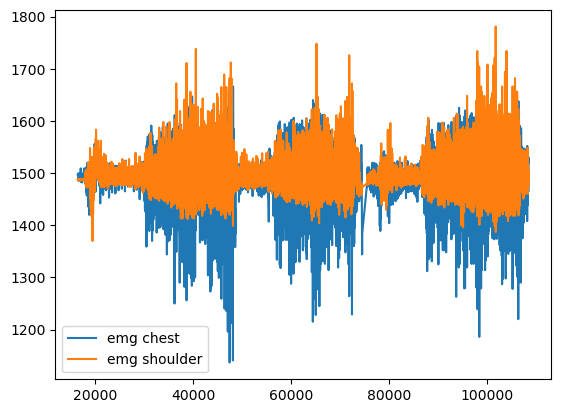

In [3]:
plt.plot(flys_time,flys_emg_chest,label="emg chest")
plt.plot(flys_time,flys_emg_shoulder,label="emg shoulder")
plt.legend()

Process MVC data

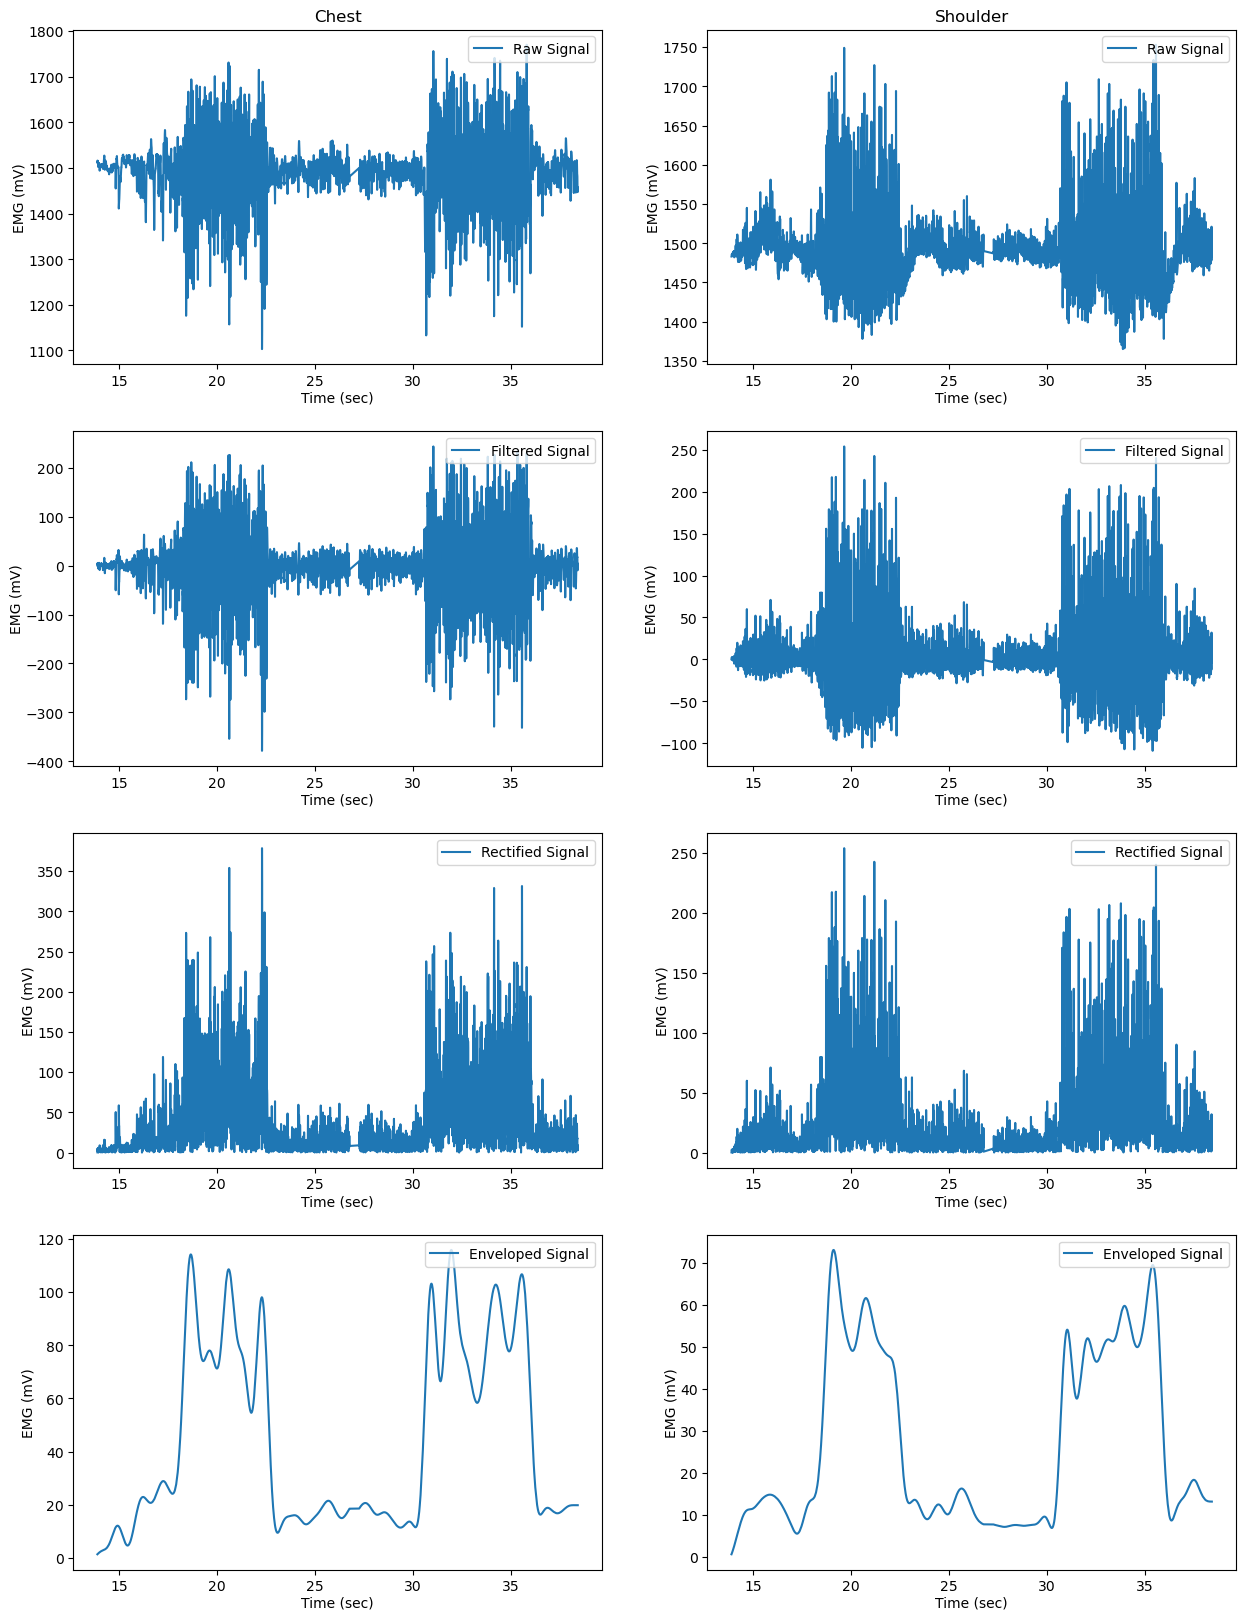

In [4]:
# Filter Data
mvc_emg_chest_filtered,mvc_emg_shoulder_filtered = bandpass_filter(mvc_emg_chest,mvc_emg_shoulder,(mvc_time/1000))

# Rectified data
mvc_emg_chest_abs_values,mvc_emg_shoulder_abs_values = rectifier(mvc_emg_chest_filtered,mvc_emg_shoulder_filtered,(mvc_time/1000))

# Enveloped data 
mvc_emg_chest_envelope,mvc_emg_shoulder_envelope =envelope(mvc_emg_chest_abs_values,mvc_emg_shoulder_abs_values,(mvc_time/1000))

# Plot
plot_all(mvc_emg_chest,mvc_emg_shoulder,mvc_emg_chest_filtered,mvc_emg_shoulder_filtered,mvc_emg_chest_abs_values,mvc_emg_shoulder_abs_values,mvc_emg_chest_envelope,mvc_emg_shoulder_envelope,mvc_time)

Calculate MVC values for 2 bursts

In [5]:
dataset = pd.DataFrame({'emg': mvc_emg_chest, 'time': mvc_time})
dataset.to_csv('mvc.csv') 

# chest
mvc_emg_chest_burst_1 = mvc_emg_chest[962:1740]
mvc_emg_chest_burst_2 = mvc_emg_chest[3505:4283]

mvc_time_burst_1 = mvc_time[962:1740]
mvc_time_burst_2 = mvc_time[3505:4283]

mvc_value_chest_1 = mvc_value(mvc_emg_chest_burst_1,mvc_time_burst_1)
mvc_value_chest_2 = mvc_value(mvc_emg_chest_burst_2,mvc_time_burst_2)
mvc_value_chest=np.average([mvc_value_chest_1,mvc_value_chest_2])

# shoulder
mvc_emg_shoulder_burst_1 = mvc_emg_shoulder[962:1740]
mvc_emg_shoulder_burst_2 = mvc_emg_shoulder[3505:4283]

mvc_time_burst_1 = mvc_time[962:1740]
mvc_time_burst_2 = mvc_time[3505:4283]

mvc_value_shoulder_1 = mvc_value(mvc_emg_shoulder_burst_1,mvc_time_burst_1)
mvc_value_shoulder_2 = mvc_value(mvc_emg_shoulder_burst_2,mvc_time_burst_2)
mvc_value_shoulder=np.average([mvc_value_shoulder_1,mvc_value_shoulder_2])

# Results
print("mvc Value chest =",mvc_value_chest)
print("mvc Value shoulder =",mvc_value_shoulder)

mvc Value chest = 80.32989256554626
mvc Value shoulder = 52.92810430200724


### Dumbbell flys angle analysis

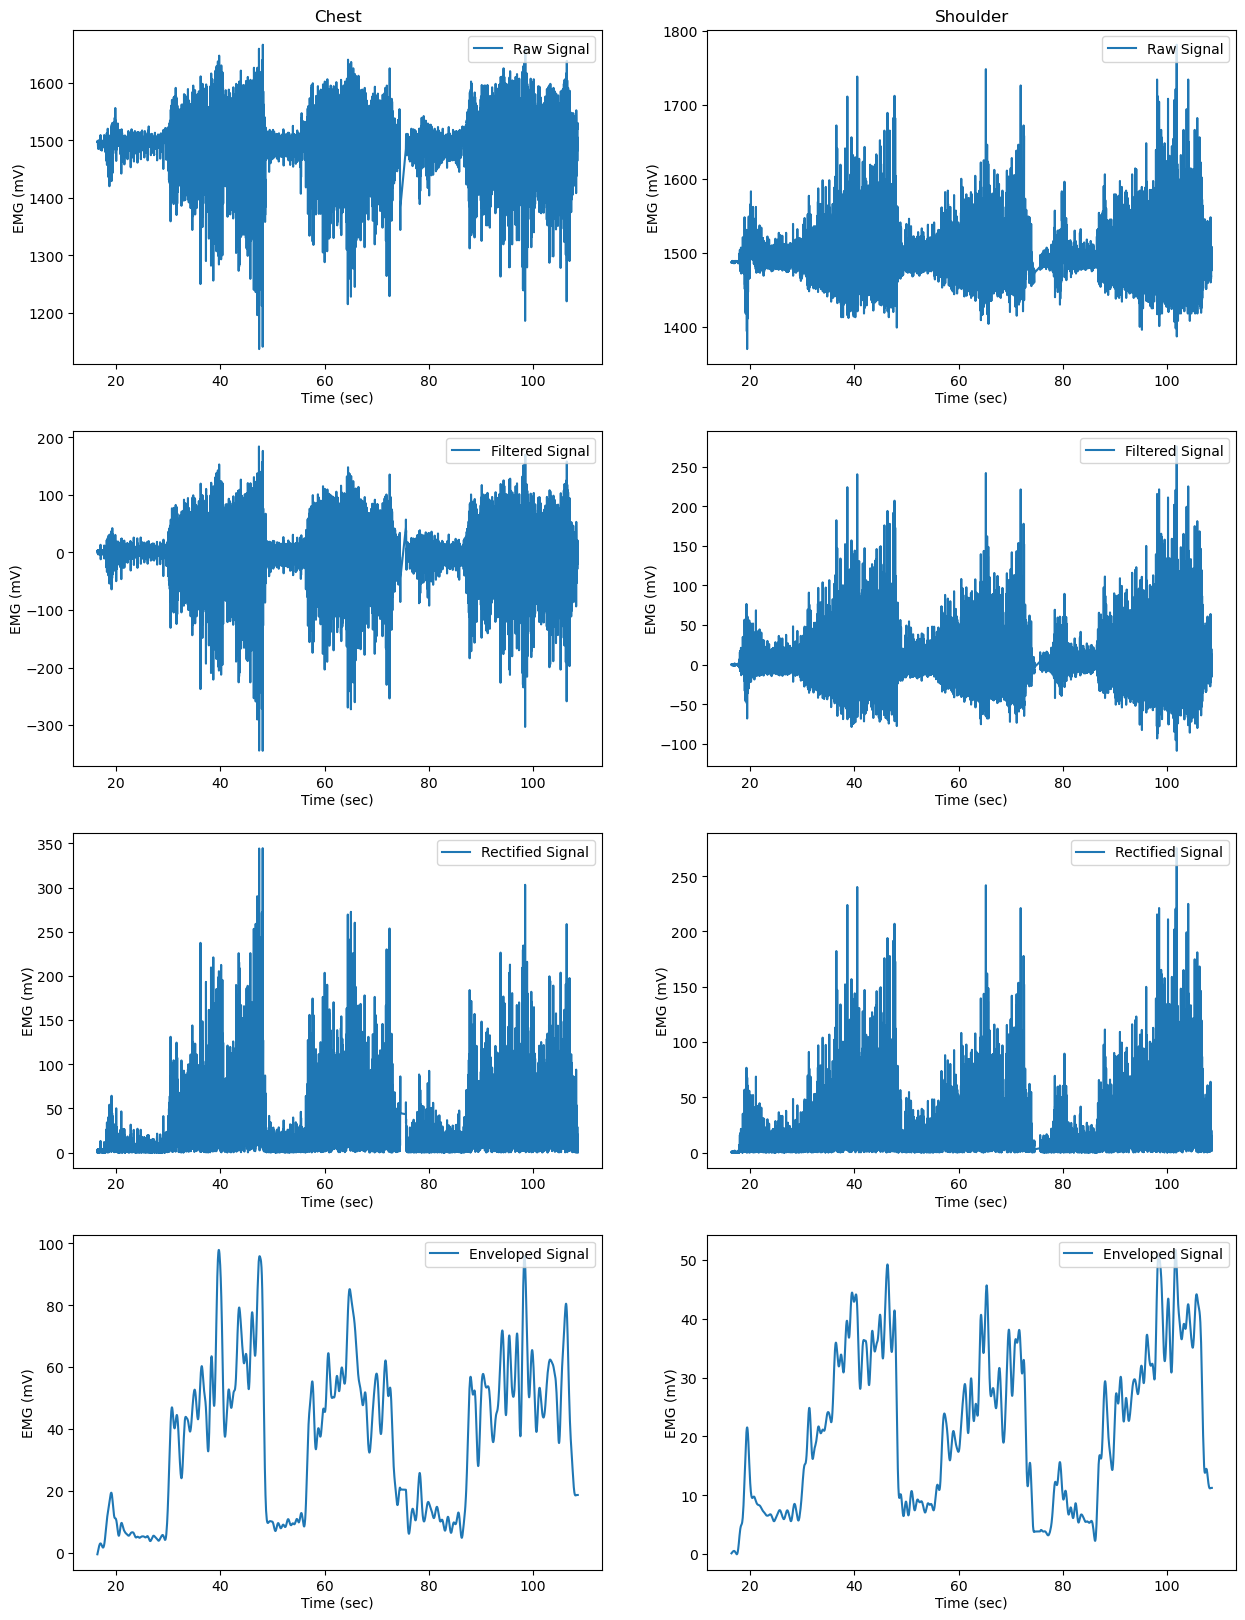

In [6]:
# filter data
flys_emg_chest_filtered,flys_emg_shoulder_filtered = bandpass_filter(flys_emg_chest,flys_emg_shoulder,(flys_time/1000))

# Rectify data
flys_emg_chest_abs_values,flys_emg_shoulder_abs_values = rectifier(flys_emg_chest_filtered,flys_emg_shoulder_filtered,(flys_time/1000))

#envelope Data
flys_emg_chest_envelope,flys_emg_shoulder_envelope =envelope(flys_emg_chest_abs_values,flys_emg_shoulder_abs_values,(flys_time/1000))

# Plot
plot_all(flys_emg_chest,flys_emg_shoulder,flys_emg_chest_filtered,flys_emg_shoulder_filtered,flys_emg_chest_abs_values,flys_emg_shoulder_abs_values,flys_emg_chest_envelope,flys_emg_shoulder_envelope,flys_time)


Extract data for each arm position
- upper_pos = 90° angle
- mid_pos = 45° angle
- low_pos = 0° angle

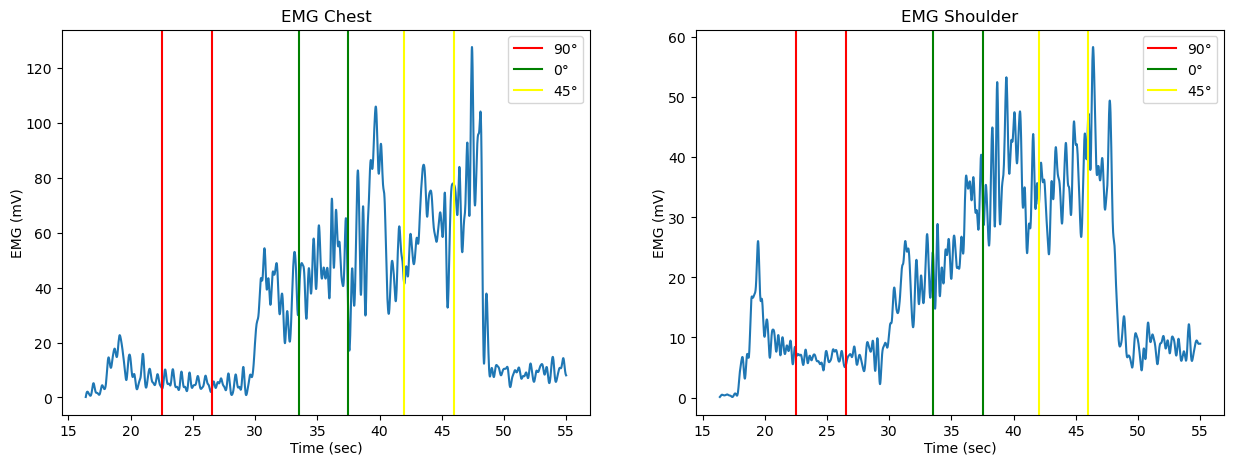

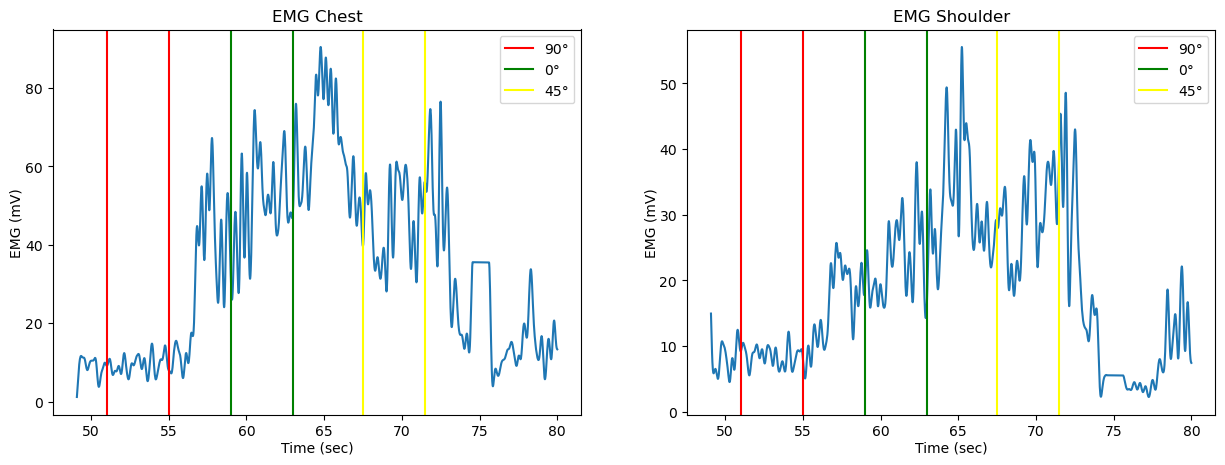

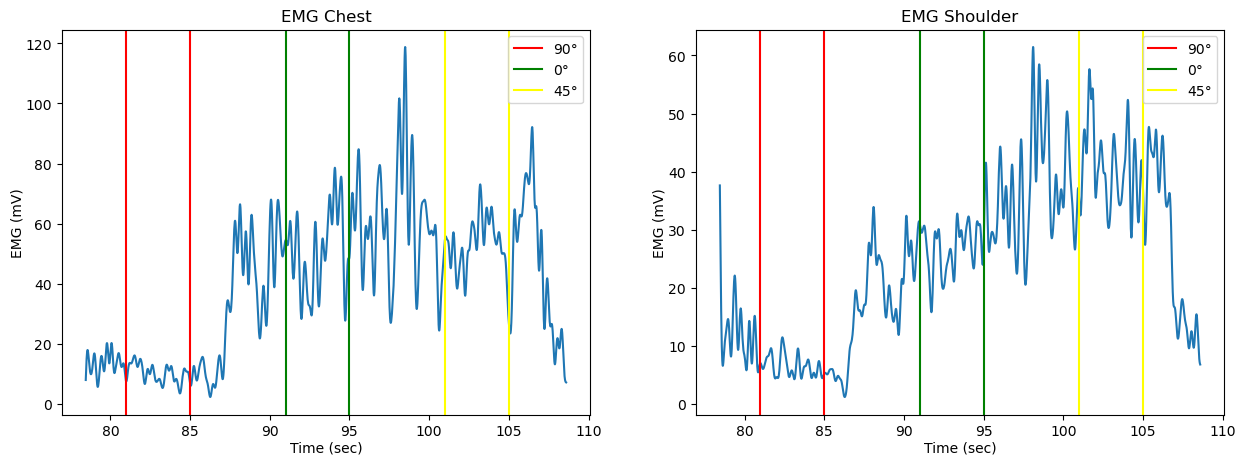

In [7]:
dataset = pd.DataFrame({'emg': flys_emg_chest, 'time': flys_time})
dataset.to_csv('flys.csv')

# burst 1
seperate_1(flys_emg_chest_abs_values[0:7911], flys_emg_shoulder_abs_values[0:7911], flys_time[0:7911])

upper_pos_chest_1 = flys_emg_chest[1252:2071]
upper_pos_shoulder_1 = flys_emg_shoulder[1252:2071]
upper_pos_T_1 = flys_time[1252:2071]

low_pos_chest_1 = flys_emg_chest[3505:4325]
low_pos_shoulder_1 = flys_emg_shoulder[3505:4325]
low_pos_T_1 = flys_time[3505:4325]

mid_pos_chest_1 = flys_emg_chest[5247:6066]
mid_pos_shoulder_1 = flys_emg_shoulder[5247:6066]
mid_pos_T_1 = flys_time[5247:6066]

# burst 2 
seperate_2(flys_emg_chest_abs_values[6700:12818], flys_emg_shoulder_abs_values[6700:12818], flys_time[6700:12818])

upper_pos_chest_2 = flys_emg_chest[7091:7911]
upper_pos_shoulder_2 = flys_emg_shoulder[7091:7911]
upper_pos_T_2 = flys_time[7091:7911]

low_pos_chest_2 = flys_emg_chest[8731:9550]
low_pos_shoulder_2 = flys_emg_shoulder[8731:9550]
low_pos_T_2 = flys_time[8731:9550]

mid_pos_chest_2 = flys_emg_chest[10472:11291]
mid_pos_shoulder_2 = flys_emg_shoulder[10472:11291]
mid_pos_T_2 = flys_time[10472:11291]

# Burst3
seperate_3(flys_emg_chest_abs_values[12500:18676], flys_emg_shoulder_abs_values[12500:18676], flys_time[12500:18676])

upper_pos_chest_3 = flys_emg_chest[13023:13842]
upper_pos_shoulder_3 = flys_emg_shoulder[13023:13842]
upper_pos_T_3 = flys_time[13023:13842]

low_pos_chest_3 = flys_emg_chest[15071:15891]
low_pos_shoulder_3 = flys_emg_shoulder[15071:15891]
low_pos_T_3 = flys_time[15071:15891]

mid_pos_chest_3 = flys_emg_chest[17119:17939]
mid_pos_shoulder_3 = flys_emg_shoulder[17119:17939]
mid_pos_T_3 = flys_time[17119:17939]


Plot tratectory of chest and shoulder activation during test

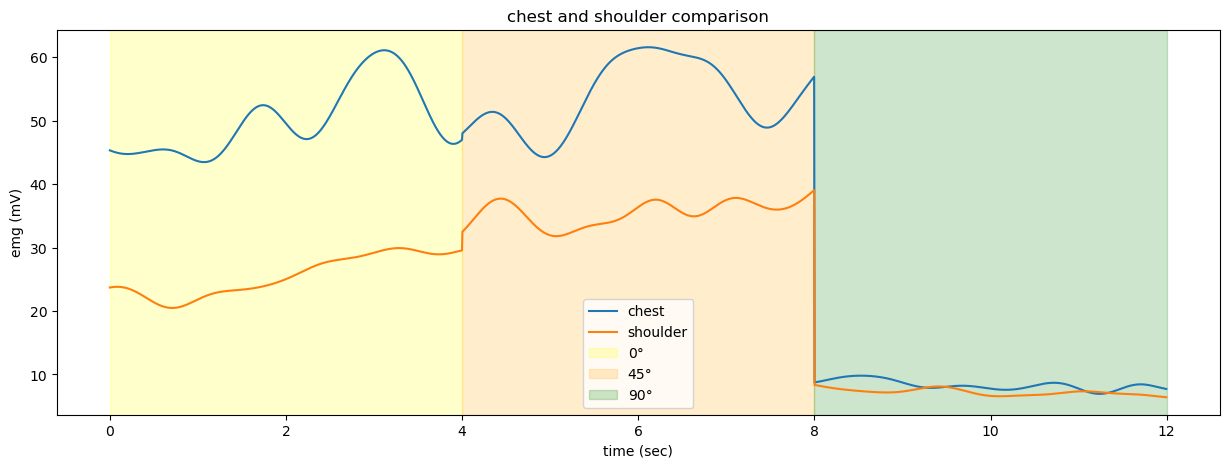

In [8]:
upper_pos_chest = trajectory_position(flys_emg_chest_envelope[1252:2071], flys_emg_chest_envelope[7091:7911],
                                      flys_emg_chest_envelope[13023:13842])

upper_pos_shoulder = trajectory_position(flys_emg_shoulder_envelope[1252:2071], flys_emg_shoulder_envelope[7091:7911],
                                         flys_emg_shoulder_envelope[13023:13842])

low_pos_chest = trajectory_position(flys_emg_chest_envelope[3505:4325], flys_emg_chest_envelope[8731:9551],
                                    flys_emg_chest_envelope[15071:15891])

low_pos_shoulder = trajectory_position(flys_emg_shoulder_envelope[3505:4325], flys_emg_shoulder_envelope[8731:9551],
                                       flys_emg_shoulder_envelope[15071:15891])

mid_pos_chest = trajectory_position(flys_emg_chest_envelope[5247:6066], flys_emg_chest_envelope[10472:11291],
                                    flys_emg_chest_envelope[17119:17939])

mid_pos_shoulder = trajectory_position(flys_emg_shoulder_envelope[5247:6066], flys_emg_shoulder_envelope[10472:11291],
                                       flys_emg_shoulder_envelope[17119:17939])

# plot
time = np.arange(0, 2458)
chest_trajectory = np.concatenate((low_pos_chest, mid_pos_chest, upper_pos_chest))
shoulder_trajectory = np.concatenate((low_pos_shoulder, mid_pos_shoulder, upper_pos_shoulder))

fig, axs = plt.subplots(1, 1, figsize=(15, 5))
axs.set_xlabel("time (sec)")
axs.set_ylabel("emg (mV)")
axs.plot(time / (2458 / 12), chest_trajectory, label="chest")
axs.set_title("chest and shoulder comparison")
axs.plot(time / (2458 / 12), shoulder_trajectory, label="shoulder")

axs.axvspan(0, 4, color="yellow", alpha=0.2, label="0°")
axs.axvspan(4, 8, color="orange", alpha=0.2, label="45°")
axs.axvspan(8, 12, color="green", alpha=0.2, label="90°")
axs.legend()
plt.savefig("chest_shoulder.png")



Extract MVC values for upper position

In [9]:
# Upper position for chest
mvc_upper_pos_chest_burst_1 = mvc_value(upper_pos_chest_1, upper_pos_T_1)
mvc_upper_pos_chest_burst_2 = mvc_value(upper_pos_chest_2, upper_pos_T_2)
mvc_upper_pos_chest_burst_3 = mvc_value(upper_pos_chest_3, upper_pos_T_3)
mvc_upper_pos_chest_mean = np.average(
    [mvc_upper_pos_chest_burst_1, mvc_upper_pos_chest_burst_2, mvc_upper_pos_chest_burst_3])
mvc_upper_pos_chest_percentage = (mvc_upper_pos_chest_mean / mvc_value_chest) * 100

# Upper postion for shoulder
mvc_upper_pos_shoulder_burst_1 = mvc_value(upper_pos_shoulder_1, upper_pos_T_1)
mvc_upper_pos_shoulder_burst_2 = mvc_value(upper_pos_shoulder_2, upper_pos_T_2)
mvc_upper_pos_shoulder_burst_3 = mvc_value(upper_pos_shoulder_3, upper_pos_T_3)
mvc_upper_pos_shoulder_mean = np.average(
    [mvc_upper_pos_shoulder_burst_1, mvc_upper_pos_shoulder_burst_2, mvc_upper_pos_shoulder_burst_3])
mvc_upper_pos_shoulder_percentage = (mvc_upper_pos_shoulder_mean / mvc_value_shoulder) * 100

print(f"mvc value upper pos chest = {mvc_upper_pos_chest_mean}")
print(f"mvc value upper pos shoulder = {mvc_upper_pos_shoulder_mean}")


mvc value upper pos chest = 8.181732974790656
mvc value upper pos shoulder = 7.033268774804072


Extract MVC values for low position

In [10]:
# Low position for chest
mvc_low_pos_chest_burst_1 = mvc_value(low_pos_chest_1, low_pos_T_1)
mvc_low_pos_chest_burst_2 = mvc_value(low_pos_chest_2, low_pos_T_2)
mvc_low_pos_chest_burst_3 = mvc_value(low_pos_chest_3, low_pos_T_3)
mvc_low_pos_chest_mean = np.average([mvc_low_pos_chest_burst_1, mvc_low_pos_chest_burst_2, mvc_low_pos_chest_burst_3])
mvc_low_pos_chest_percentage = (mvc_low_pos_chest_mean / mvc_value_chest) * 100

# Low position for shoulder
mvc_low_pos_shoulder_burst_1 = mvc_value(low_pos_shoulder_1, low_pos_T_1)
mvc_low_pos_shoulder_burst_2 = mvc_value(low_pos_shoulder_2, low_pos_T_2)
mvc_low_pos_shoulder_burst_3 = mvc_value(low_pos_shoulder_3, low_pos_T_3)
mvc_low_pos_shoulder_mean = np.average(
    [mvc_low_pos_shoulder_burst_1, mvc_low_pos_shoulder_burst_2, mvc_low_pos_shoulder_burst_3])
mvc_low_pos_shoulder_percentage = (mvc_low_pos_shoulder_mean / mvc_value_shoulder) * 100

print(f"mvc value low pos chest = {mvc_low_pos_chest_mean}")
print(f"mvc value low pos shoulder = {mvc_low_pos_shoulder_mean}")



mvc value low pos chest = 49.23697642202678
mvc value low pos shoulder = 25.079597280588956


Extract MVC values for mid position

In [11]:
# Mid position for chest
mvc_mid_pos_chest_burst_1 =  mvc_value(mid_pos_chest_1, mid_pos_T_1)
mvc_mid_pos_chest_burst_2 =  mvc_value(mid_pos_chest_2, mid_pos_T_2)
mvc_mid_pos_chest_burst_3 =  mvc_value(mid_pos_chest_3, mid_pos_T_3)
mvc_mid_pos_chest_mean = np.average([mvc_mid_pos_chest_burst_1, mvc_mid_pos_chest_burst_2, mvc_mid_pos_chest_burst_3])
mvc_mid_pos_chest_percentage = (mvc_mid_pos_chest_mean / mvc_value_chest) * 100

# Mid position for shoulder
mvc_mid_pos_shoulder_burst_1 =  mvc_value(mid_pos_shoulder_1, mid_pos_T_1)
mvc_mid_pos_shoulder_burst_2 =  mvc_value(mid_pos_shoulder_2, mid_pos_T_2)
mvc_mid_pos_shoulder_burst_3 =  mvc_value(mid_pos_shoulder_3, mid_pos_T_3)
mvc_mid_pos_shoulder_mean = np.average([mvc_mid_pos_shoulder_burst_1, mvc_mid_pos_shoulder_burst_2, mvc_mid_pos_shoulder_burst_3])
mvc_mid_pos_shoulder_percentage = (mvc_mid_pos_shoulder_mean / mvc_value_shoulder) * 100

print(f"mvc value mid pos chest = {mvc_mid_pos_chest_mean}")
print(f"mvc value mid pos shoulder = {mvc_mid_pos_shoulder_mean}")

mvc value mid pos chest = 52.368065373403454
mvc value mid pos shoulder = 34.80471608918148


Plot Bar chart

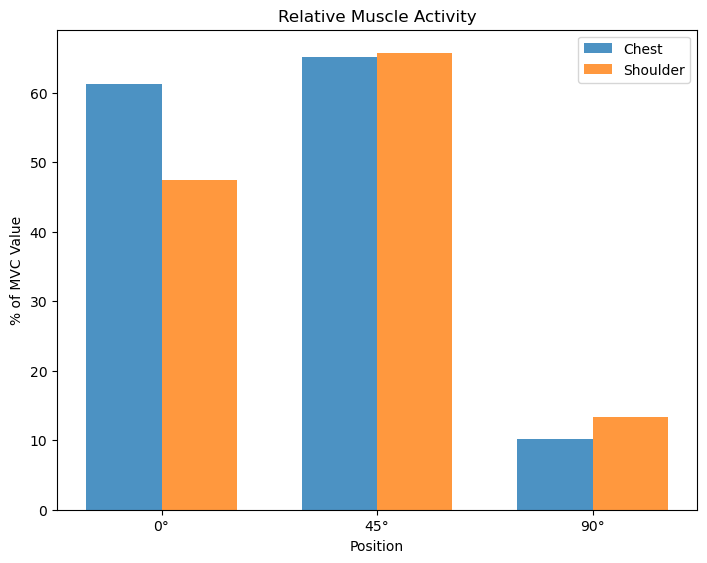

In [12]:
#Balkendiagramm
create_bar_chart(mvc_low_pos_chest_percentage,mvc_mid_pos_chest_percentage,mvc_upper_pos_chest_percentage,mvc_low_pos_shoulder_percentage,mvc_mid_pos_shoulder_percentage,mvc_upper_pos_shoulder_percentage)

Create summary plot

array([12.039361339656352, 12.063594489882426, 12.086584726498588, ...,
       11.263889854640281, 11.263923863570284, 11.263950883235129],
      dtype=object)

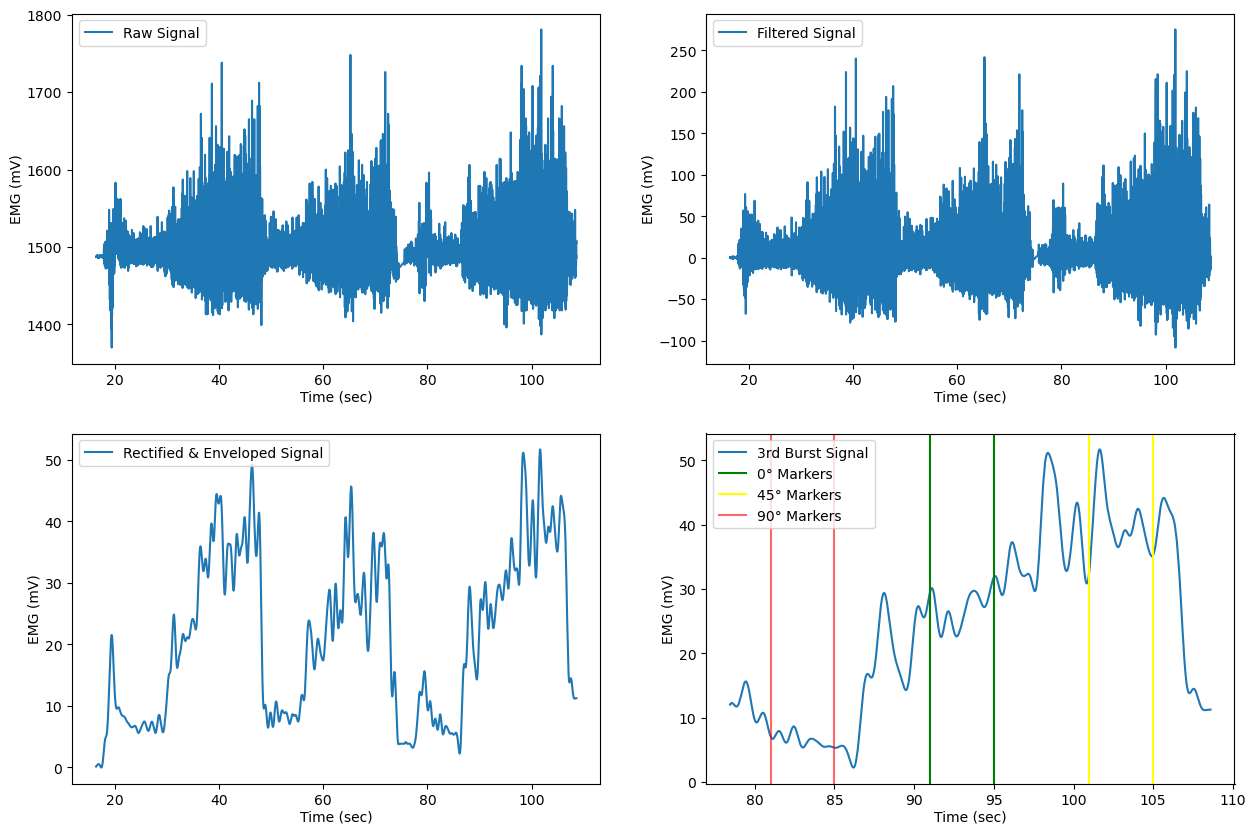

In [13]:
plot(flys_emg_shoulder,flys_emg_shoulder_filtered,flys_emg_shoulder_envelope,flys_emg_shoulder_envelope[12500:18676],flys_time,flys_time[12500:18676]) 